In [217]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

### 1. Import

In [218]:
df = pd.read_csv('data/cars_infos_cleaned.csv')

### 2. Correlation

In [219]:
#Après le nettoyage, on a les colonnes propres, avec les unités indiquées
df.sample(2)

,Prix($),Marque,Modèle,Classe,Portes,Longueur(cm),Hauteur(cm),Largeur(cm),Empattement(cm),Moteur(cm³),...,Chevaux,Régime(tr/min),Turbo,Cylindres,Injecteur,TypeMoteur,Alésage(mm),Piston(cm),TauxCompression,CoteRisque
52,6795.0,Mazda,Rx2 Coupe,Hayon,3,404,137,163,236,1491,...,68,5000,False,4,2BBL,OHC,77,8,9.0,1
37,7895.0,Honda,Accord,Hayon,3,425,135,166,245,1803,...,86,5800,False,4,1BBL,OHC,80,9,9.0,0


📝 Price sera notre y, et les autres colonnes des features potentielles

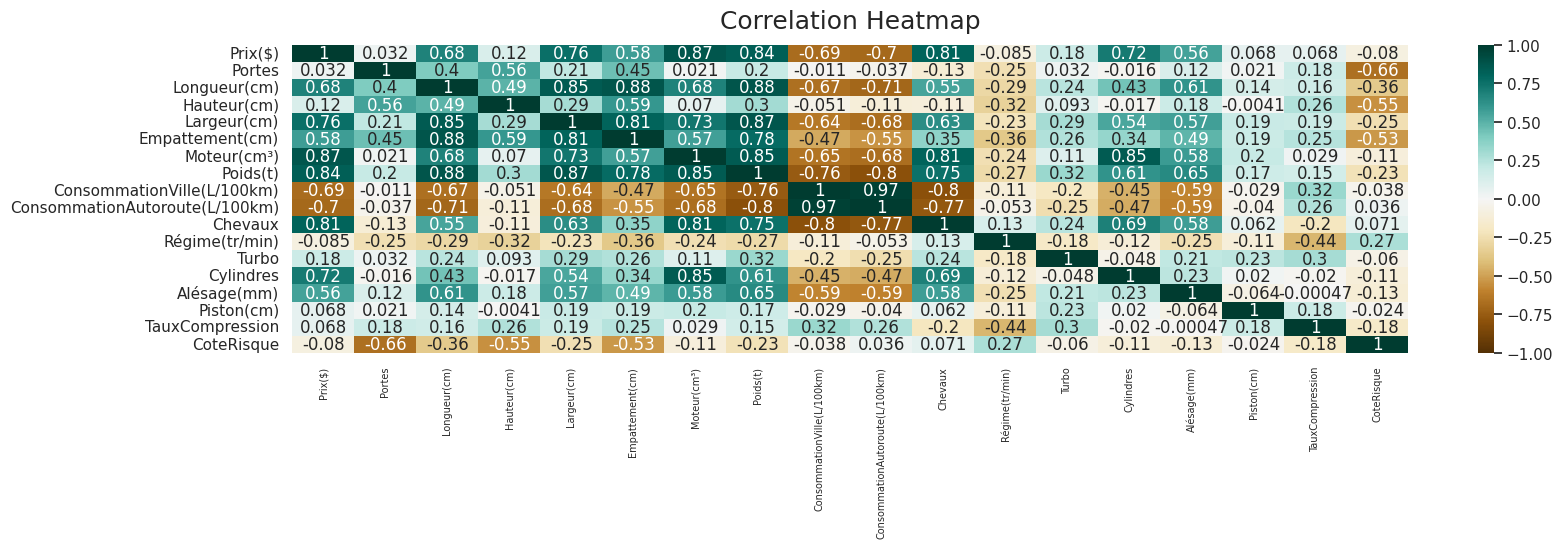

In [220]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(18, 4))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_xticklabels(labels=heatmap.get_xticklabels(),size=7)
plt.show()

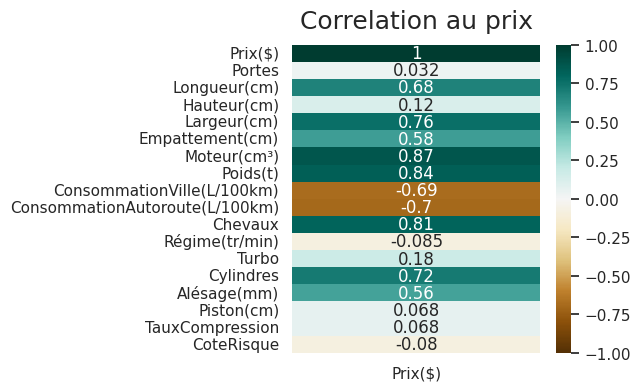

In [221]:
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(df_corr[['Prix($)']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation au prix', fontdict={'fontsize':18}, pad=12);
plt.show()


📝 Si on s'arrête la correlation des features sur le prix, on observe :<br>

- La taille de la voiture, la taille du moteur, les cheveaux, ont une forte influence positive<br>
    Plus la voiture est grande, et plus elle est puissante, plus elle sera chère.

- Le taux de risque à l'assurance et le régime de point ont une influence presque nulle<br>
    ils ne changent presque pas le prix.

- La consommation d'essence a une forte influence negative<br>
    Plus elle consomme, moins la voiture sera chère.

### 3. Correlation par colonne

3.1 Nombre de portes

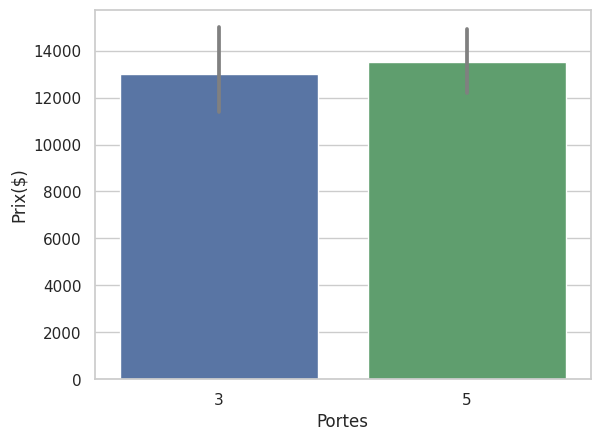

In [222]:
sns.set_theme(style="whitegrid", palette="deep6")
sns.barplot(y=df['Prix($)'],x=df.Portes, errcolor='grey')
plt.show()

Les voitures 5 portes sont légérement plus chères,  
Mais on voit avec l'écart type que ça reste dans le même ordre de prix

3.2 Marque

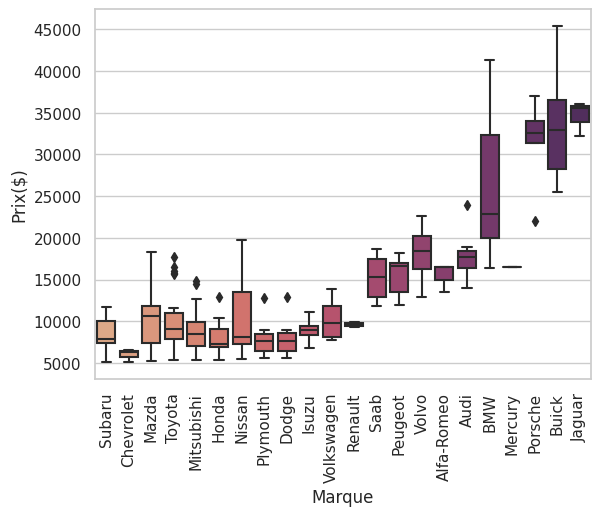

In [223]:
df_sorted = df.sort_values('Prix($)')
ax = sns.boxplot(x='Marque', y='Prix($)', data=df_sorted, palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

On voit ici que la marque a une grosse incidence sur le prix, une jaguar peux voiloir jusqu'à 6 fois une Chevrolet

3.3 Classe

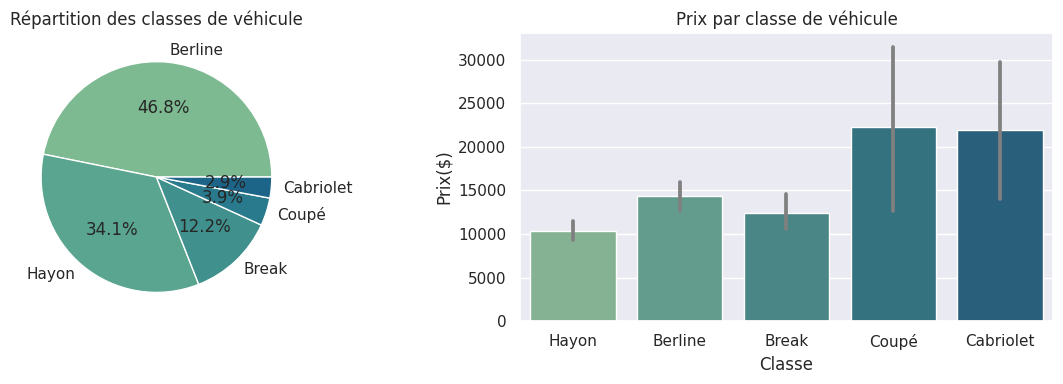

In [224]:
sns.set_theme(palette='crest')

# Pie chart
classes_count = df_sorted['Classe'].value_counts()
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%')
plt.title('Répartition des classes de véhicule')

# Bar plot
plt.subplot(1, 2, 2)
sns.barplot(x='Classe', y='Prix($)', data=df_sorted, errcolor='grey')
plt.title('Prix par classe de véhicule')

# Afficher les graphiques
plt.tight_layout()
plt.show()


Les coupés et les cabriolets voient leurs prix gonflés par leur classe.

3.4 Carburant

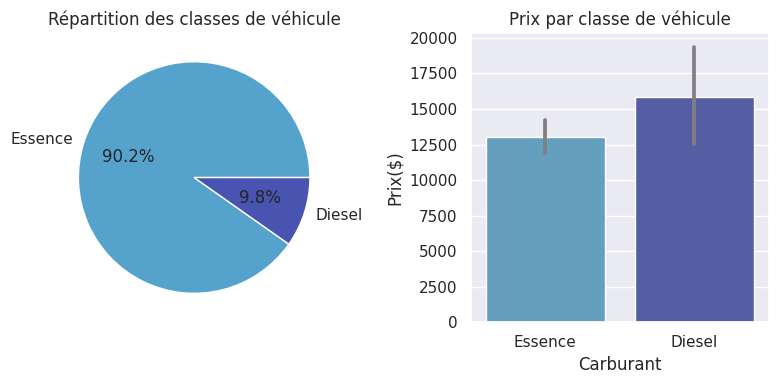

In [225]:
sns.set_theme(palette='icefire')

# Pie chart
classes_count = df_sorted['Carburant'].value_counts()
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%')
plt.title('Répartition des types de carburants')

# Bar plot
plt.subplot(1, 2, 2)
sns.barplot(x='Carburant', y='Prix($)', data=df_sorted, errcolor='grey')
plt.title('Prix par type de carburant')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Bien qu'ils ne representent que 10% du panel, les véhicules diesel se vendent plus cher.

3.5 Consommation

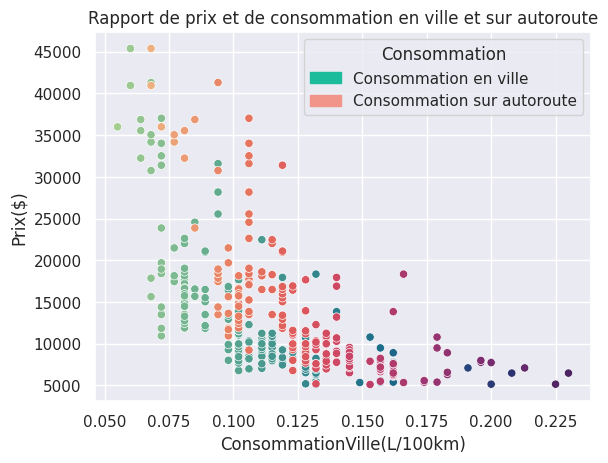

In [226]:
import matplotlib.patches as mpatches

# Création d'un dictionnaire pour mapper les couleurs aux légendes
color_dict = {'ConsommationVille(L/100km)': '#ff7f0e', 'ConsommationAutoroute(L/100km)': '#1f77b4'}

# Création des légendes
patch1 = mpatches.Patch(color='#1abc9c', label='Consommation en ville')
patch2 = mpatches.Patch(color='#f1948a', label='Consommation sur autoroute')

# Création du scatterplot pour la consommation en ville
sns.scatterplot(y='Prix($)', x='ConsommationVille(L/100km)', hue='ConsommationVille(L/100km)', data=df, palette='crest')

# Création du scatterplot pour la consommation sur autoroute
sns.scatterplot(y='Prix($)', x='ConsommationAutoroute(L/100km)', hue='ConsommationAutoroute(L/100km)', data=df, palette='flare')

# Ajout des deux légendes
plt.legend(handles=[patch1, patch2], title='Consommation', loc='upper right')

# Titre du graphique
plt.title('Rapport de prix et de consommation en ville et sur autoroute')

# Affichage du graphique
plt.show()


On retrouve la corrélation où la consommation de carburant fait perdre en valeur du véhicule.

3.6 Dimensions

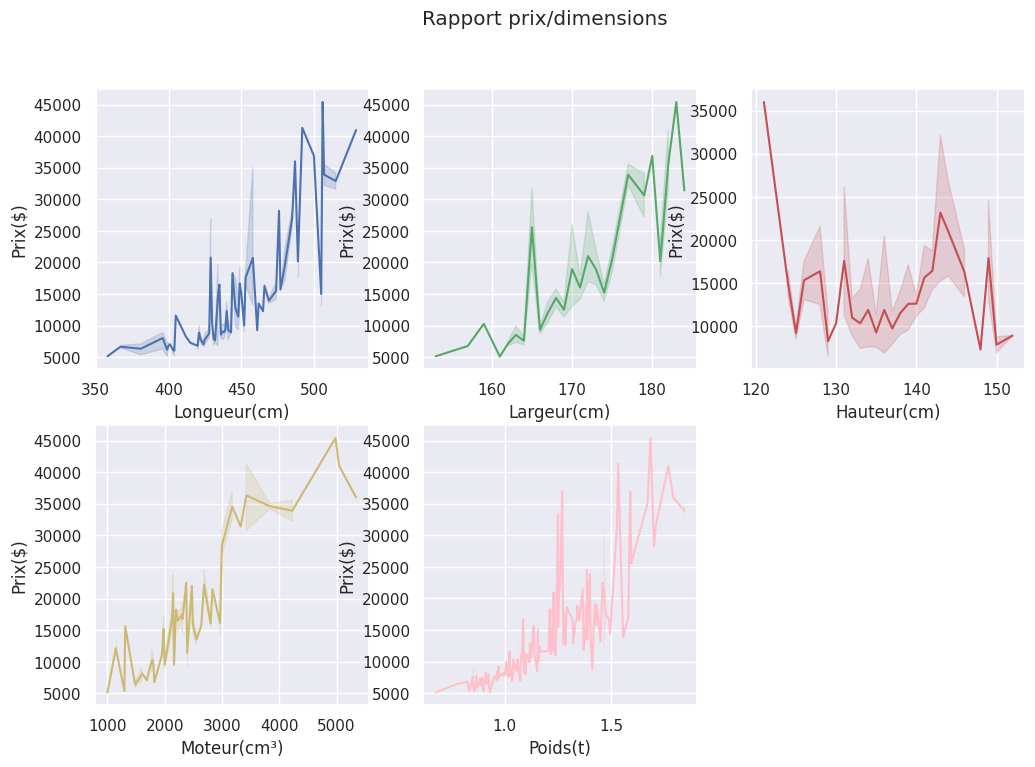

In [238]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Graphiques pour la première rangée
sns.lineplot(x='Longueur(cm)', y='Prix($)', data=df, ax=axes[0, 0], color='b')
sns.lineplot(x='Largeur(cm)', y='Prix($)', data=df, ax=axes[0, 1], color='g')
sns.lineplot(x='Hauteur(cm)', y='Prix($)', data=df, ax=axes[0, 2], color='r')

# Graphiques pour la deuxième rangée
sns.lineplot(x='Moteur(cm³)', y='Prix($)', data=df, ax=axes[1, 0], color='y')
sns.lineplot(x='Poids(t)', y='Prix($)', data=df, ax=axes[1, 1], color='pink')

# Supprimer le sixième graphique
axes[1, 2].axis('off')

# Titre global
fig.suptitle('Rapport prix/dimensions')

plt.show()


La dimension au sol influe sur le prix. Plus elle est longue ou large, plus son prix est elevé.  
La taille du moteur observe une courbe similaire.
En revanche, la courbe est inversé pour la hauteur.  
L'intuition vient sans doute que ce sont les coupés et les cabriolets qui sont plus bas et se vendent plus chers.

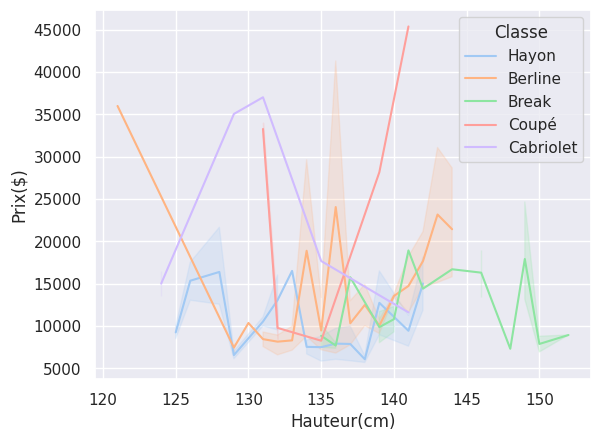

In [228]:
sns.lineplot(x='Hauteur(cm)', y='Prix($)', data=df_sorted, hue='Classe', palette='pastel')
plt.show()


On peut quand même observer que les vehicules les plus chers sont les cabriolets et les coupés mais aussi les berlines basses

3.6 Mécanique

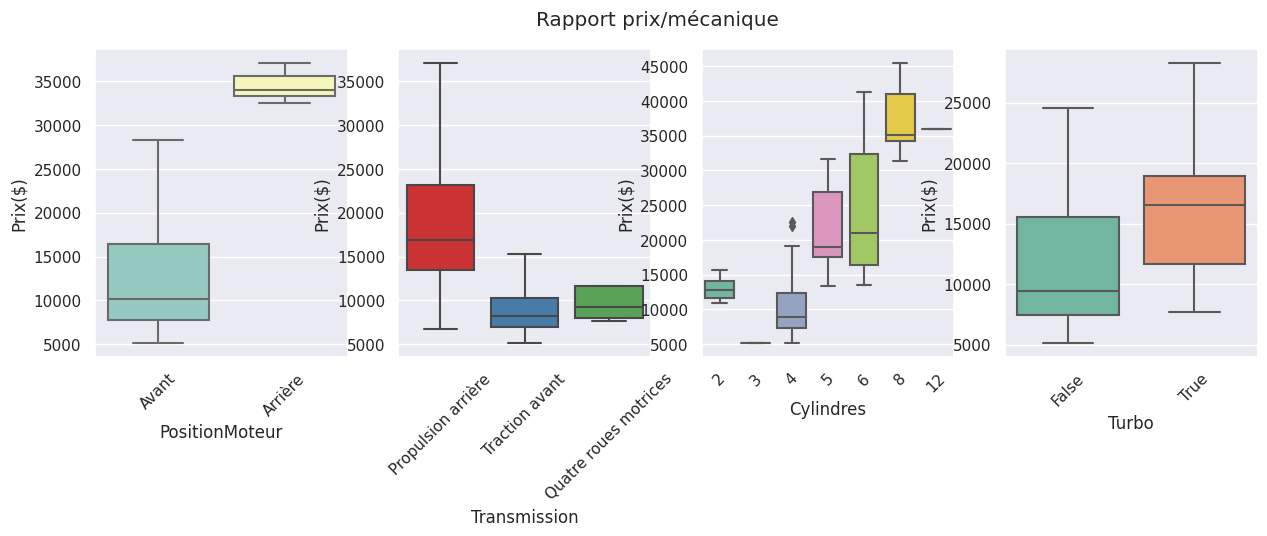

In [268]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Graphiques pour la première rangée
sns.set_theme(palette='Set3')
sns.boxplot(x='PositionMoteur', y='Prix($)', data=df, ax=axes[0], showfliers=False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
sns.set_theme(palette='Set1')
sns.boxplot(x='Transmission', y='Prix($)', data=df, ax=axes[1], showfliers=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
sns.set_theme(palette='Set2')
sns.boxplot(x='Cylindres', y='Prix($)', data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
sns.set_theme(palette='Set2')
sns.boxplot(x='Turbo', y='Prix($)', data=df, ax=axes[3], showfliers=False)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45)

# Titre global
fig.suptitle('Rapport prix/mécanique')

plt.show()


Les moteurs à l'arrière, et la propulsion arrière, sont souvent sur les modèles sports. D'où l'incidence de prix. 

3.7 Puissance

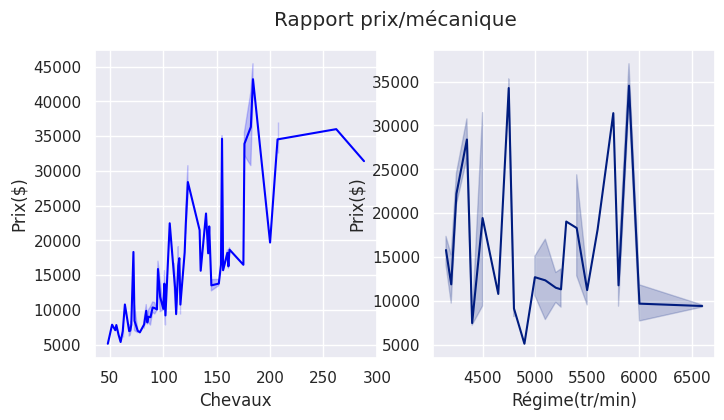

In [278]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Graphiques pour la première rangée
sns.lineplot(x='Chevaux', y='Prix($)', data=df, ax=axes[0], color='blue')
sns.lineplot(x='Régime(tr/min)', y='Prix($)', data=df, ax=axes[1], color='b')

# Titre global
fig.suptitle('Rapport prix/mécanique')

plt.show()

Le nombre de chevaux a une incidence évidente mais le régime de pointe ne semble pas avoir une corrélation précise